In [15]:
# 1. INSTALASI LIBRARY YANG DIPERLUKAN
print("📦 Installing required libraries...")
!pip install textblob
!pip install vaderSentiment
!pip install wordcloud
!pip install plotly
!pip install seaborn
!pip install scikit-learn
!pip install nltk

# Download NLTK data


📦 Installing required libraries...

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

print("✅ Libraries installed successfully!")

✅ Libraries installed successfully!


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/igederizkiherianaprayoga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/igederizkiherianaprayoga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/igederizkiherianaprayoga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
# ================================================
# 2. IMPORT SEMUA LIBRARY
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Text processing
import re
import string
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

# NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Utilities
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [18]:
# ================================================
# 3. MEMBUAT DATA SAMPLE (GANTI DENGAN DATA ANDA)
# ================================================

# Load data
df = pd.read_csv('berita_top_10_perusahaan_detik.csv')

# Membuat DataFrame

print("📊 Sample data created successfully!")
print(f"Dataset shape: {df.shape}")
print("\n" + "="*50)
print("PREVIEW DATA:")
print("="*50)
print(df.head())



📊 Sample data created successfully!
Dataset shape: (200, 4)

PREVIEW DATA:
          kata_kunci                                              judul  \
0  Bank Central Asia         BCA Kantongi Laba Rp 54,8 T Sepanjang 2024   
1  Bank Central Asia            Rincian Utang Bejibun Sritex ke 28 Bank   
2  Bank Central Asia  Perbankan Siapkan Uang Tunai Tambahan buat Per...   
3  Bank Central Asia  Pengumuman! Biaya Admin & Limit Transaksi BCA ...   
4  Bank Central Asia  Limit Transaksi dan Biaya Admin BCA Naik Mulai...   

                                                 url  \
0  https://finance.detik.com/bursa-dan-valas/d-77...   
1  https://finance.detik.com/moneter/d-7611176/ri...   
2  https://finance.detik.com/moneter/d-7683138/pe...   
3  https://finance.detik.com/moneter/d-7123612/pe...   
4  https://www.detik.com/jateng/bisnis/d-7149438/...   

                                          isi_berita  
0  PT Bank Central Asia Tbk (BCA) mencatatkan lab...  
1  Pengadilan Negeri Niaga 

In [19]:
# ================================================
# 4. FUNGSI PREPROCESSING TEXT
# ================================================

def preprocess_text(text):
    """Enhanced text preprocessing for Indonesian text"""
    if pd.isna(text):
        return ""

    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove numbers but keep percentage
    text = re.sub(r'\d+(?!\s*%)', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuation except % and -
    text = re.sub(r'[^\w\s%-]', ' ', text)

    return text.strip()

# Enhanced Indonesian stopwords
indonesian_stopwords = {
    'ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir',
    'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar',
    'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya',
    'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awalnya', 'bagai', 'bagaikan',
    'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya',
    'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini',
    'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja',
    'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada',
    'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun',
    'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya',
    'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlai',
    'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula',
    'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut',
    'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa',
    'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bukan', 'bukankah',
    'bukanlah', 'bukannya', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah',
    'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi',
    'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah',
    'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat',
    'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan',
    'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan',
    'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilakukannya', 'dimaksud', 'dimaksudkan',
    'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah',
    'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan',
    'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan',
    'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini',
    'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan',
    'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan',
    'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat',
    'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunanya', 'hal', 'hampir', 'hanya',
    'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya',
    'hingga', 'ia', 'ialah', 'iaitu', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat',
    'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah',
    'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab',
    'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga',
    'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami',
    'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya',
    'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil',
    'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'keluar', 'kemana',
    'kemana-mana', 'kemarin', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada',
    'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'ketimbang',
    'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah',
    'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima',
    'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mana', 'manakala',
    'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing',
    'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang',
    'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan',
    'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan',
    'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan',
    'menandaskan', 'menanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat',
    'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa',
    'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki',
    'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira',
    'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju',
    'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan',
    'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka',
    'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip',
    'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah',
    'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'oleh', 'olehnya', 'pada', 'padahal',
    'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting',
    'pentingnya', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama',
    'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun',
    'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling',
    'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat',
    'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana',
    'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak',
    'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya',
    'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang',
    'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera',
    'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar',
    'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekarang',
    'sekecil', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela',
    'selagi', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya',
    'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih',
    'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua',
    'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang',
    'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak',
    'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali',
    'seseorang', 'sesuai', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat',
    'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya',
    'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah',
    'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya',
    'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya',
    'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat',
    'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak',
    'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat',
    'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk',
    'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama',
    'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tidak', 'tidakkah', 'tidaklah', 'tiga', 'tinggi',
    'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum',
    'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu',
    'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang', 'pt', 'tbk'
}

def remove_stopwords_indonesian(text):
    """Remove Indonesian stopwords"""
    words = text.split()
    return ' '.join([word for word in words if word not in indonesian_stopwords])

# Apply preprocessing
print("🔧 Preprocessing text data...")
df['judul_clean'] = df['judul'].apply(preprocess_text)
df['isi_berita_clean'] = df['isi_berita'].apply(preprocess_text)
df['judul_clean'] = df['judul_clean'].apply(remove_stopwords_indonesian)
df['isi_berita_clean'] = df['isi_berita_clean'].apply(remove_stopwords_indonesian)

# Gabungkan judul dan isi berita untuk analisis
df['text_gabungan'] = df['judul_clean'] + ' ' + df['isi_berita_clean']

print("✅ Text preprocessing completed!")

🔧 Preprocessing text data...
✅ Text preprocessing completed!


In [20]:
# ================================================
# 5. ANALISIS SENTIMEN MENGGUNAKAN TEXTBLOB (TETAP SAMA)
# ================================================

def analyze_sentiment_textblob(text):
    """Enhanced TextBlob sentiment analysis with Indonesian context"""
    if not text or text.strip() == "":
        return 'Neutral', 0.0

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Adjusted thresholds for better accuracy
    if polarity > 0.2:
        return 'Positive', polarity
    elif polarity < -0.2:
        return 'Negative', polarity
    else:
        return 'Neutral', polarity

print("📈 Analyzing sentiment with TextBlob...")
sentiment_results = df['text_gabungan'].apply(analyze_sentiment_textblob)
df['sentiment_textblob'] = [result[0] for result in sentiment_results]
df['polarity_textblob'] = [result[1] for result in sentiment_results]


📈 Analyzing sentiment with TextBlob...


In [21]:
# ================================================
# 6. ANALISIS SENTIMEN MENGGUNAKAN VADER
# ================================================

def analyze_sentiment_vader(text):
    """Enhanced VADER sentiment analysis"""
    if not text or text.strip() == "":
        return 'Neutral', 0.0

    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']

    # Adjusted thresholds for financial context
    if compound >= 0.15:
        return 'Positive', compound
    elif compound <= -0.15:
        return 'Negative', compound
    else:
        return 'Neutral', compound
print("📊 Analyzing sentiment with VADER...")
vader_results = df['text_gabungan'].apply(analyze_sentiment_vader)
df['sentiment_vader'] = [result[0] for result in vader_results]
df['compound_vader'] = [result[1] for result in vader_results]


📊 Analyzing sentiment with VADER...


In [22]:
# ================================================
# 7. ANALISIS SENTIMEN BERDASARKAN KATA KUNCI (DIPERBAIKI)
# ================================================

# Enhanced financial keywords with weights and context
def analyze_sentiment_keyword_advanced(text):
    """Advanced keyword-based sentiment analysis with weights and context"""
    if not text or text.strip() == "":
        return 'Neutral', 0.0

    text_lower = text.lower()

    # Enhanced positive keywords with weights
    positive_keywords = {
        # Strong positive indicators
        'naik': 3, 'meningkat': 3, 'tumbuh': 3, 'boom': 3, 'melambung': 3,
        'rebound': 3, 'rally': 3, 'bullish': 3, 'breakout': 3,

        # Moderate positive indicators
        'positif': 2, 'optimis': 2, 'untung': 2, 'laba': 2, 'profit': 2,
        'keuntungan': 2, 'surplus': 2, 'solid': 2, 'kuat': 2, 'stabil': 2,
        'gemilang': 2, 'berhasil': 2, 'sukses': 2, 'efisien': 2, 'inovasi': 2,
        'ekspansi': 2, 'berkembang': 2, 'maju': 2, 'membaik': 2, 'recovery': 2,

        # Mild positive indicators
        'baik': 1, 'puas': 1, 'menjanjikan': 1, 'potensial': 1, 'peluang': 1,
        'optimisme': 1, 'harapan': 1, 'kepercayaan': 1, 'mantap': 1
    }

    # Enhanced negative keywords with weights
    negative_keywords = {
        # Strong negative indicators
        'turun': 3, 'menurun': 3, 'jatuh': 3, 'terjun': 3, 'ambruk': 3,
        'crash': 3, 'bearish': 3, 'breakdown': 3, 'collapse': 3, 'anjlok': 3,

        # Moderate negative indicators
        'negatif': 2, 'buruk': 2, 'rugi': 2, 'kerugian': 2, 'defisit': 2,
        'lemah': 2, 'jelek': 2, 'gagal': 2, 'masalah': 2, 'krisis': 2,
        'resesi': 2, 'penurunan': 2, 'kemunduran': 2, 'merosot': 2,

        # Mild negative indicators
        'tantangan': 1, 'risiko': 1, 'tekanan': 1, 'sulit': 1, 'ketat': 1,
        'ketidakpastian': 1, 'khawatir': 1, 'pesimis': 1, 'hati-hati': 1,
        'waspada': 1, 'concern': 1
    }

    # Calculate weighted scores
    pos_score = 0
    neg_score = 0

    # Count positive keywords with weights
    for keyword, weight in positive_keywords.items():
        count = text_lower.count(keyword)
        pos_score += count * weight

    # Count negative keywords with weights
    for keyword, weight in negative_keywords.items():
        count = text_lower.count(keyword)
        neg_score += count * weight

    # Calculate final score
    final_score = pos_score - neg_score

    # Determine sentiment with adjusted thresholds
    if final_score > 2:
        return 'Positive', final_score
    elif final_score < -2:
        return 'Negative', final_score
    else:
        return 'Neutral', final_score

print("🎯 Analyzing sentiment with improved keywords...")
keyword_results = df['text_gabungan'].apply(analyze_sentiment_keyword_advanced)
df['sentiment_keyword'] = [result[0] for result in keyword_results]
df['score_keyword'] = [result[1] for result in keyword_results]


🎯 Analyzing sentiment with improved keywords...


In [23]:
# ================================================
# 8. ENSEMBLE SENTIMENT (GABUNGAN)
# ================================================

def weighted_ensemble_sentiment(textblob_sent, textblob_score, vader_sent, vader_score,
                               keyword_sent, keyword_score, method_weights=None):
    """
    Advanced weighted ensemble sentiment analysis

    Args:
        method_weights: dict with weights for each method
                       default: {'keyword': 0.5, 'vader': 0.3, 'textblob': 0.2}
    """
    if method_weights is None:
        method_weights = {
            'keyword': 0.9,    # Highest weight for keyword method
            'vader': 0.05,      # Medium weight for VADER
            'textblob': 0.05    # Lowest weight for TextBlob
        }

    # Create sentiment mapping
    sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}

    # Calculate weighted sentiment scores
    weighted_score = (
        sentiment_map.get(textblob_sent, 0) * method_weights['textblob'] +
        sentiment_map.get(vader_sent, 0) * method_weights['vader'] +
        sentiment_map.get(keyword_sent, 0) * method_weights['keyword']
    )

    # Also consider the actual scores for tie-breaking
    normalized_scores = {
        'textblob': textblob_score if textblob_score is not None else 0,
        'vader': vader_score if vader_score is not None else 0,
        'keyword': keyword_score / 10 if keyword_score is not None else 0  # Normalize keyword score
    }

    # Calculate confidence based on agreement between methods
    sentiments = [textblob_sent, vader_sent, keyword_sent]
    agreement = max(sentiments.count('Positive'), sentiments.count('Negative'), sentiments.count('Neutral'))
    confidence = agreement / len(sentiments)

    # Determine final sentiment with confidence threshold
    if weighted_score > 0.15:
        final_sentiment = 'Positive'
    elif weighted_score < -0.15:
        final_sentiment = 'Negative'
    else:
        final_sentiment = 'Neutral'

    # Override with keyword method if it's strongly confident and others disagree
    if abs(keyword_score) > 5 and keyword_sent in ['Positive', 'Negative']:
        if confidence < 0.7:  # Low agreement between methods
            final_sentiment = keyword_sent
            confidence = 0.8  # High confidence in keyword override

    return final_sentiment, weighted_score, confidence


print("🔄 Creating weighted ensemble sentiment...")
df['sentiment_weighted_ensemble'] = df.apply(lambda row: weighted_ensemble_sentiment(
    row['sentiment_textblob'], row['polarity_textblob'],
    row['sentiment_vader'], row['compound_vader'],
    row['sentiment_keyword'], row['score_keyword']
), axis=1)

# Unpack the results into separate columns
df[['sentiment_ensemble', 'weighted_score_ensemble', 'confidence_ensemble']] = pd.DataFrame(df['sentiment_weighted_ensemble'].tolist(), index=df.index)

🔄 Creating weighted ensemble sentiment...


📊 Creating visualizations...


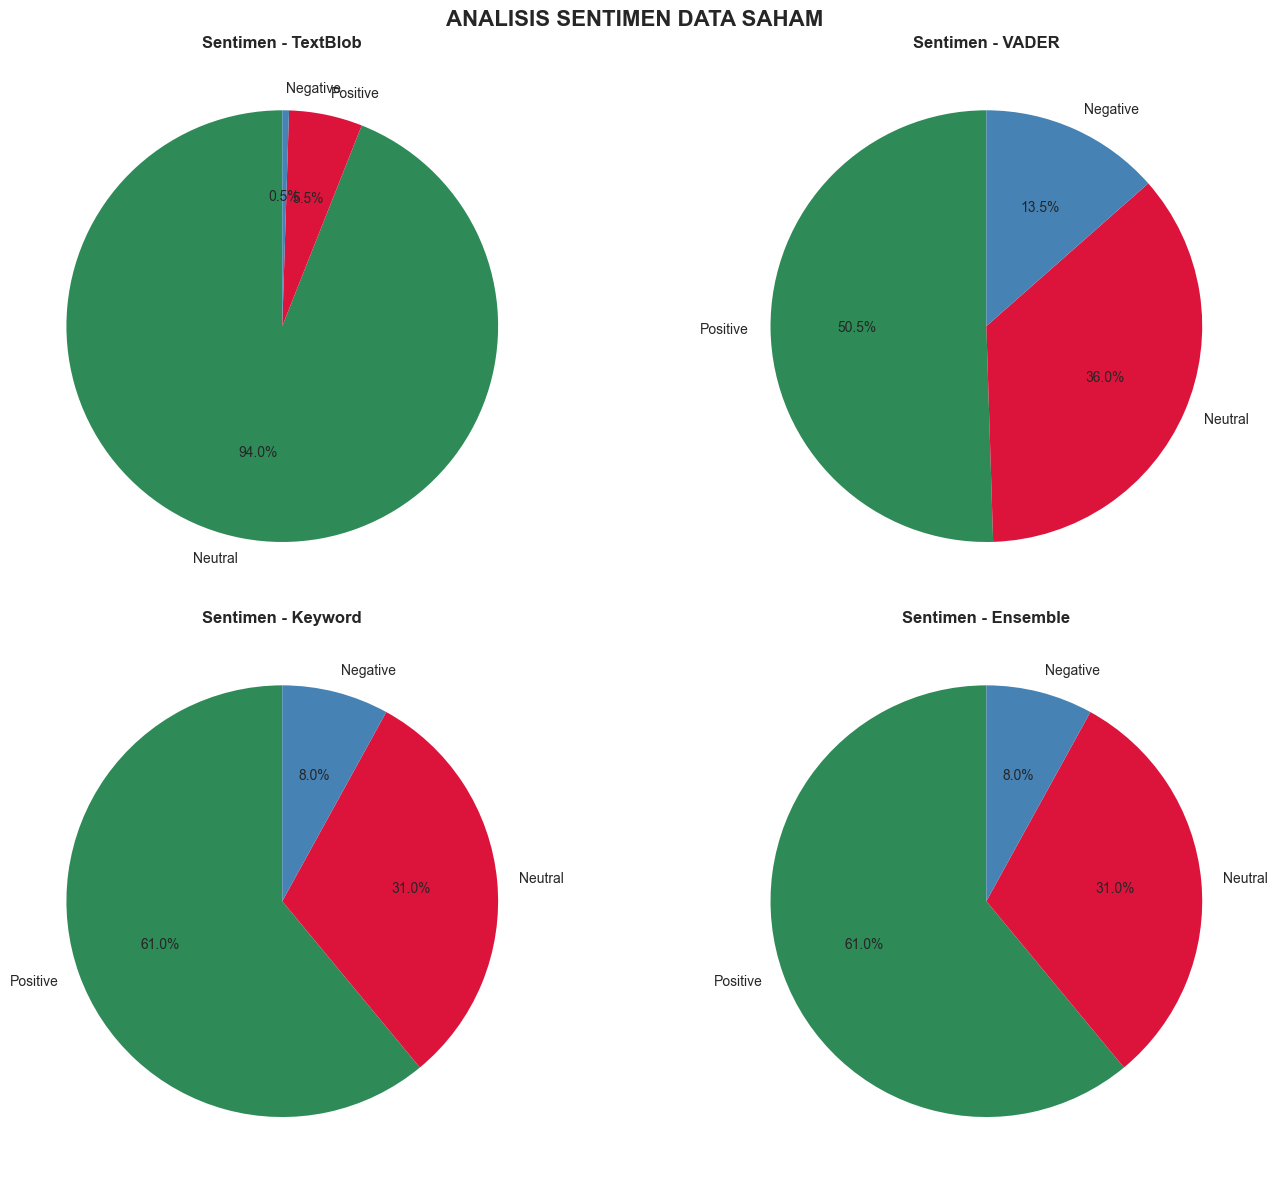

<Figure size 1200x800 with 0 Axes>

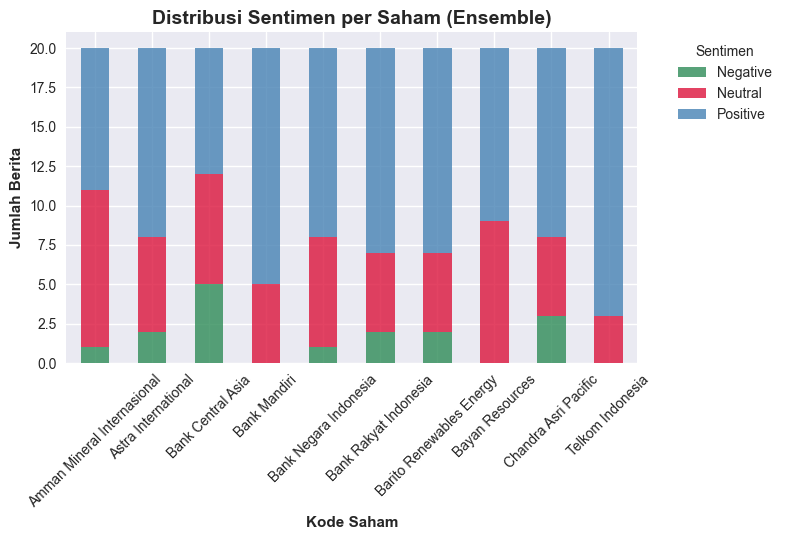

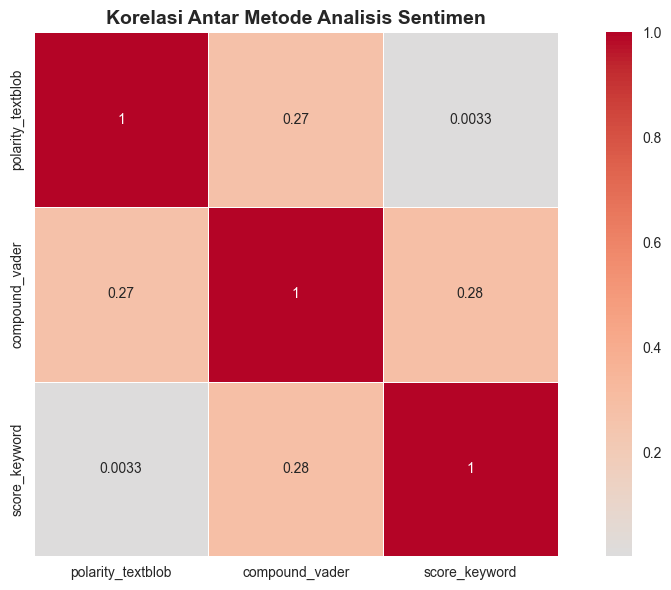

In [24]:
# ================================================
# 9. VISUALISASI HASIL
# ================================================

print("📊 Creating visualizations...")

# Set style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('ANALISIS SENTIMEN DATA SAHAM', fontsize=16, fontweight='bold')

# 1. Distribusi Sentimen per Metode
methods = ['TextBlob', 'VADER', 'Keyword', 'Ensemble']
sentiment_cols = ['sentiment_textblob', 'sentiment_vader', 'sentiment_keyword', 'sentiment_ensemble']

for i, (method, col) in enumerate(zip(methods, sentiment_cols)):
    sentiment_counts = df[col].value_counts()
    colors = ['#2E8B57', '#DC143C', '#4682B4']  # Green, Red, Blue

    if i < 2:
        row, col_idx = 0, i
    else:
        row, col_idx = 1, i-2

    axes[row, col_idx].pie(sentiment_counts.values,
                          labels=sentiment_counts.index,
                          autopct='%1.1f%%',
                          colors=colors,
                          startangle=90)
    axes[row, col_idx].set_title(f'Sentimen - {method}', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Perbandingan Sentimen Antar Saham
plt.figure(figsize=(12, 8))
sentiment_by_stock = pd.crosstab(df['kata_kunci'], df['sentiment_ensemble'])
sentiment_by_stock.plot(kind='bar', stacked=True,
                       color=['#2E8B57', '#DC143C', '#4682B4'],
                       alpha=0.8)
plt.title('Distribusi Sentimen per Saham (Ensemble)', fontsize=14, fontweight='bold')
plt.xlabel('Kode Saham', fontweight='bold')
plt.ylabel('Jumlah Berita', fontweight='bold')
plt.legend(title='Sentimen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Heatmap Korelasi Skor Sentimen
plt.figure(figsize=(10, 6))
sentiment_scores = df[['polarity_textblob', 'compound_vader', 'score_keyword']].corr()
sns.heatmap(sentiment_scores, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Korelasi Antar Metode Analisis Sentimen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [25]:
# ================================================
# 10. VISUALISASI INTERAKTIF DENGAN PLOTLY
# ================================================

print("🎨 Creating interactive visualizations...")

# 1. Scatter Plot Interaktif
fig = px.scatter(df, x='polarity_textblob', y='compound_vader',
                color='sentiment_ensemble', hover_data=['kata_kunci', 'judul'],
                title='Perbandingan Skor Sentimen TextBlob vs VADER',
                labels={'polarity_textblob': 'TextBlob Polarity',
                       'compound_vader': 'VADER Compound'})
# fig.show()

# 2. Bar Chart Interaktif
sentiment_summary = df.groupby(['kata_kunci', 'sentiment_ensemble']).size().reset_index(name='count')
fig = px.bar(sentiment_summary, x='kata_kunci', y='count', color='sentiment_ensemble',
             title='Distribusi Sentimen per Saham (Interactive)',
             labels={'kata_kunci': 'Kode Saham', 'count': 'Jumlah Berita'})
# fig.show()

🎨 Creating interactive visualizations...


☁️ Generating word clouds...


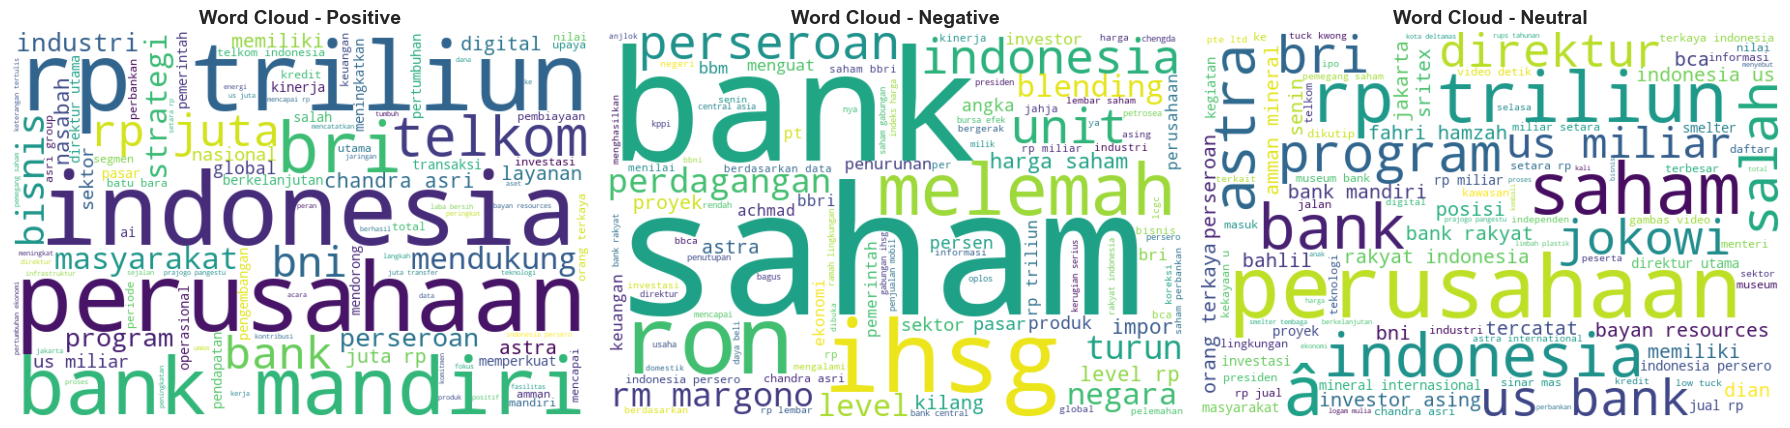

In [26]:
# ================================================
# 11. WORD CLOUD
# ================================================

print("☁️ Generating word clouds...")

# Word Cloud untuk setiap sentimen
sentiments = ['Positive', 'Negative', 'Neutral']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    sentiment_text = ' '.join(df[df['sentiment_ensemble'] == sentiment]['text_gabungan'])

    if sentiment_text.strip():
        wordcloud = WordCloud(width=600, height=400,
                            background_color='white',
                            colormap='viridis',
                            max_words=100).generate(sentiment_text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'Word Cloud - {sentiment}', fontsize=14, fontweight='bold')
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'No {sentiment} data',
                    horizontalalignment='center', verticalalignment='center',
                    transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'Word Cloud - {sentiment}', fontsize=14, fontweight='bold')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

In [27]:
# ================================================
# 12. STATISTIK DETAIL
# ================================================

print("\n" + "="*60)
print("📊 STATISTIK DETAIL ANALISIS SENTIMEN")
print("="*60)

# Statistik umum
print(f"Total berita dianalisis: {len(df)}")
print(f"Unique saham: {df['kata_kunci'].nunique()}")
print(f"Daftar saham: {', '.join(df['kata_kunci'].unique())}")

print("\n" + "-"*40)
print("DISTRIBUSI SENTIMEN ENSEMBLE:")
print("-"*40)
ensemble_dist = df['sentiment_ensemble'].value_counts()
for sentiment, count in ensemble_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{sentiment:12}: {count:3d} ({percentage:5.1f}%)")

print("\n" + "-"*40)
print("RATA-RATA SKOR SENTIMEN:")
print("-"*40)
print(f"TextBlob Polarity   : {df['polarity_textblob'].mean():.4f}")
print(f"VADER Compound      : {df['compound_vader'].mean():.4f}")
print(f"Keyword Score       : {df['score_keyword'].mean():.4f}")

print("\n" + "-"*40)
print("SENTIMEN PER SAHAM (ENSEMBLE):")
print("-"*40)
for stock in df['kata_kunci'].unique():
    stock_data = df[df['kata_kunci'] == stock]
    sentiment_dist = stock_data['sentiment_ensemble'].value_counts()
    print(f"\n{stock}:")
    for sentiment, count in sentiment_dist.items():
        print(f"  {sentiment:10}: {count}")


📊 STATISTIK DETAIL ANALISIS SENTIMEN
Total berita dianalisis: 200
Unique saham: 10
Daftar saham: Bank Central Asia, Bank Rakyat Indonesia, Chandra Asri Pacific, Barito Renewables Energy, Bank Mandiri, Bayan Resources, Amman Mineral Internasional, Telkom Indonesia, Astra International, Bank Negara Indonesia

----------------------------------------
DISTRIBUSI SENTIMEN ENSEMBLE:
----------------------------------------
Positive    : 122 ( 61.0%)
Neutral     :  62 ( 31.0%)
Negative    :  16 (  8.0%)

----------------------------------------
RATA-RATA SKOR SENTIMEN:
----------------------------------------
TextBlob Polarity   : 0.0266
VADER Compound      : 0.2792
Keyword Score       : 11.6800

----------------------------------------
SENTIMEN PER SAHAM (ENSEMBLE):
----------------------------------------

Bank Central Asia:
  Positive  : 8
  Neutral   : 7
  Negative  : 5

Bank Rakyat Indonesia:
  Positive  : 13
  Neutral   : 5
  Negative  : 2

Chandra Asri Pacific:
  Positive  : 12
  Neut

In [28]:
# ================================================
# 13. EXPORT HASIL
# ================================================

print("\n" + "="*40)
print("💾 EXPORT HASIL")
print("="*40)

# Siapkan DataFrame hasil
hasil_df = df[[
    'kata_kunci', 'judul', 'url',
    'sentiment_textblob', 'polarity_textblob',
    'sentiment_vader', 'compound_vader',
    'sentiment_keyword', 'score_keyword',
    'sentiment_ensemble'
]].copy()

# Tambahkan kolom interpretasi
def interpret_sentiment(sentiment, score):
    if sentiment == 'Positive':
        if score > 0.5:
            return 'Sangat Positif'
        else:
            return 'Positif'
    elif sentiment == 'Negative':
        if score < -0.5:
            return 'Sangat Negatif'
        else:
            return 'Negatif'
    else:
        return 'Netral'

hasil_df['interpretasi'] = hasil_df.apply(lambda row: interpret_sentiment(
    row['sentiment_ensemble'],
    row['compound_vader']
), axis=1)

# Tampilkan hasil final
print("HASIL ANALISIS SENTIMEN:")
print(hasil_df[['kata_kunci', 'judul', 'sentiment_ensemble', 'interpretasi']])

# Save to CSV
hasil_df.to_csv('hasil_analisis_sentimen.csv', index=False)
print(f"\n✅ Hasil disimpan ke 'hasil_analisis_sentimen.csv'")




💾 EXPORT HASIL
HASIL ANALISIS SENTIMEN:
                kata_kunci                                              judul  \
0        Bank Central Asia         BCA Kantongi Laba Rp 54,8 T Sepanjang 2024   
1        Bank Central Asia            Rincian Utang Bejibun Sritex ke 28 Bank   
2        Bank Central Asia  Perbankan Siapkan Uang Tunai Tambahan buat Per...   
3        Bank Central Asia  Pengumuman! Biaya Admin & Limit Transaksi BCA ...   
4        Bank Central Asia  Limit Transaksi dan Biaya Admin BCA Naik Mulai...   
..                     ...                                                ...   
195  Bank Negara Indonesia  BNI Cetak Laba Rp 5,3 T di Kuartal I-2024, Nai...   
196  Bank Negara Indonesia  Erick Thohir Rombak Direksi & Komisaris BNI, W...   
197  Bank Negara Indonesia  BNI Jadi Satu-satunya Bank Asal Indonesia Raih...   
198  Bank Negara Indonesia  BNI Sediakan Uang Tunai Rp 26,6 T Selama Perio...   
199  Bank Negara Indonesia  Dukung Transisi Energi, BNI Danai Proyek

In [29]:
# ================================================
# 14. MODEL MACHINE LEARNING SEDERHANA
# ================================================

print("\n" + "="*50)
print("🤖 TRAINING MODEL MACHINE LEARNING")
print("="*50)

# Prepare data for ML
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text_gabungan'])
y = df['sentiment_ensemble']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

# Evaluation
print("HASIL EVALUASI MODEL:")
print(f"Accuracy: {nb_model.score(X_test, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))




🤖 TRAINING MODEL MACHINE LEARNING
HASIL EVALUASI MODEL:
Accuracy: 0.6833

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         4
     Neutral       0.80      0.38      0.52        21
    Positive       0.66      0.94      0.78        35

    accuracy                           0.68        60
   macro avg       0.49      0.44      0.43        60
weighted avg       0.67      0.68      0.63        60



In [33]:
# ================================================
# 15. FUNGSI PREDIKSI UNTUK TEKS BARU (ENHANCED)
# ================================================

def predict_sentiment_new_text(text):
    """
    Fungsi untuk memprediksi sentimen teks baru
    """
    # Preprocess
    clean_text = preprocess_text(text)
    clean_text = remove_stopwords_indonesian(clean_text)

    # TextBlob
    blob = TextBlob(clean_text)
    textblob_polarity = blob.sentiment.polarity
    textblob_sentiment = 'Positive' if textblob_polarity > 0.1 else 'Negative' if textblob_polarity < -0.1 else 'Neutral'

    # VADER
    analyzer = SentimentIntensityAnalyzer()
    vader_scores = analyzer.polarity_scores(clean_text)
    vader_compound = vader_scores['compound']
    vader_sentiment = 'Positive' if vader_compound >= 0.05 else 'Negative' if vader_compound <= -0.05 else 'Neutral'

    # Keyword
    keyword_result = analyze_sentiment_keyword_advanced(clean_text)
    keyword_sentiment = keyword_result[0]
    keyword_score = keyword_result[1]

    # Ensemble
    ensemble_result = weighted_ensemble_sentiment(textblob_sentiment, textblob_polarity, vader_sentiment, vader_compound, keyword_sentiment, keyword_score)
    ensemble_sentiment = ensemble_result[0]
    ensemble_confidence = ensemble_result[2]

    # ML Prediction
    text_vector = vectorizer.transform([clean_text])
    ml_pred = le.inverse_transform(nb_model.predict(text_vector))[0]

    return {
        'text': text,
        'textblob': textblob_sentiment,
        'vader': vader_sentiment,
        'keyword': keyword_sentiment,
        'ensemble': ensemble_sentiment,
        'ensemble_confidence': ensemble_confidence,
        'ml_prediction': ml_pred,
        'ml_confidence': nb_model.predict_proba(text_vector).max()
    }

def print_sentiment_result(result):
    """
    Fungsi untuk menampilkan hasil prediksi dengan format yang lebih jelas
    """
    print("\n" + "="*60)
    print("🔮 HASIL ANALISIS SENTIMEN")
    print("="*60)
    print(f"📝 Teks: {result['text']}")
    print("-"*60)

    # Detail setiap metode
    print("📊 Detail Hasil:")
    print(f"   • TextBlob    : {result['textblob']}")
    print(f"   • VADER       : {result['vader']}")
    print(f"   • Keyword     : {result['keyword']}")
    print(f"   • Ensemble    : {result['ensemble']} (Confidence: {result['ensemble_confidence']:.4f})")
    # print(f"   • ML Model    : {result['ml_prediction']} (Confidence: {result['ml_confidence']:.4f})")

    print("-"*60)

    # Menentukan hasil final berdasarkan ensemble (yang biasanya paling akurat)
    final_sentiment = result['ensemble']
    final_confidence = result['ensemble_confidence']

    # Emoji untuk setiap sentimen
    emoji_map = {
        'Positive': '😊✅',
        'Negative': '😞❌',
        'Neutral': '😐⚪'
    }

    # Warna ANSI untuk terminal
    color_map = {
        'Positive': '\033[92m',  # Green
        'Negative': '\033[91m',  # Red
        'Neutral': '\033[93m'    # Yellow
    }
    reset_color = '\033[0m'

    # Tampilkan hasil final dengan bold dan warna
    print("🎯 KESIMPULAN FINAL:")
    print(f"   {emoji_map.get(final_sentiment, '🤔')} SENTIMEN: {color_map.get(final_sentiment, '')}\033[1m{final_sentiment.upper()}\033[0m{reset_color}")
    print(f"   📈 Confidence: {final_confidence:.2%}")

    # Interpretasi confidence
    if final_confidence >= 0.8:
        confidence_level = "SANGAT TINGGI 🔥"
    elif final_confidence >= 0.6:
        confidence_level = "TINGGI 👍"
    elif final_confidence >= 0.4:
        confidence_level = "SEDANG ⚖️"
    else:
        confidence_level = "RENDAH ⚠️"

    print(f"   🎚️ Level Keyakinan: {confidence_level}")
    print("="*60)

# Test fungsi prediksi
test_text = "Saham PT XYZ Tbk menunjukkan performa yang solid setelah merilis laporan keuangan terbaru yang mencatat pertumbuhan pendapatan dan laba bersih di atas ekspektasi pasar. Optimisme investor semakin meningkat seiring perbaikan fundamental perusahaan serta prospek bisnis yang cerah di tengah pemulihan ekonomi nasional. Aktivitas beli oleh investor institusi juga mendorong harga saham naik dan berhasil menembus level resistance, sehingga saham ini dinilai berpotensi melanjutkan tren penguatan dalam waktu dekat."



# POSITIF
# "Saham PT XYZ Tbk menunjukkan performa yang solid setelah merilis laporan keuangan terbaru yang mencatat pertumbuhan pendapatan dan laba bersih di atas ekspektasi pasar. Optimisme investor semakin meningkat seiring perbaikan fundamental perusahaan serta prospek bisnis yang cerah di tengah pemulihan ekonomi nasional. Aktivitas beli oleh investor institusi juga mendorong harga saham naik dan berhasil menembus level resistance, sehingga saham ini dinilai berpotensi melanjutkan tren penguatan dalam waktu dekat."

# NETRAL
# "Saham PT XYZ Tbk bergerak stabil dalam beberapa hari terakhir, seiring dengan tidak adanya sentimen signifikan yang mempengaruhi pasar. Volume perdagangan cenderung normal dan harga saham berada pada kisaran yang sama seperti pekan sebelumnya. Investor masih menunggu informasi atau data fundamental terbaru sebelum mengambil keputusan lebih lanjut, sementara aktivitas transaksi berjalan wajar sesuai dengan kondisi pasar saat ini."

# NEGATIF
# "Saham PT XYZ Tbk mengalami tekanan jual yang signifikan dalam beberapa hari terakhir akibat laporan keuangan kuartal II yang di bawah ekspektasi pasar. Penurunan pendapatan dan laba bersih yang tajam, serta prospek bisnis yang masih menghadapi tantangan akibat ketidakpastian ekonomi global, menyebabkan investor menjadi pesimis terhadap kinerja saham ini ke depan. Selain itu, aksi jual oleh investor institusi memperburuk sentimen negatif di pasar, sehingga harga saham XYZ Tbk terus melemah dan berpotensi menembus level support terdekat."

# "Menjelang hari besar Natal dan Tahun Baru (Nataru) 2024-2025, sejumlah perbankan menyiapkan penambahan uang tunai dan beberapa layanannya untuk mengantisipasi lonjakan transaksi selama periode liburan. PT Bank Mandiri (Persero) mengalokasikan uang tunai secara net sebesar Rp 26 triliun untuk periode Nataru, naik 4,6% dibandingkan realisasi tahun sebelumnya. SEVP Corporate Relations Bank Mandiri Wisnu Trihanggodo menjelaskan, penyediaan uang tunai dilakukan menyusul proyeksi kenaikan transaksi ATM/CRM masyarakat, dengan periode libur Nataru selama 33 hari mulai 1 Desember 2024 hingga 2 Januari 2025. Berdasarkan historis, proyeksi kenaikan kebutuhan dana untuk ATM/CRM tahun ini sebesar 3,3%, yang difokuskan pada mesin-mesin di bandara, terminal, stasiun kereta, serta tempat wisata utama. Wisnu menyebut perseroan telah mengantisipasi puncak transaksi nasabah di ATM maupun EDC selama puncak Nataru, dengan total 12.885 mesin ATM Bank Mandiri yang beroperasi dan terhubung ke jaringan ATM Link, ATM Bersama, ATM Prima, serta Visa/Plus di seluruh Indonesia, sementara jaringan Mandiri EDC tercatat sebanyak 258.000 unit di seluruh merchant. Puncak kebutuhan pengisian uang ATM diprediksi terjadi dua hari sebelum Natal dan dua hari sebelum Tahun Baru 2025. Transaksi pada mesin EDC juga diperkirakan meningkat selama Hari Raya Natal dan Tahun Baru 2025, seiring pembagian THR bagi karyawan yang merayakan Natal. Untuk mendukung transaksi non tunai, Bank Mandiri telah menyediakan 259.000 jaringan EDC dan mendistribusikan 947.000 kartu uang elektronik Mandiri e-money ke jaringan cabang dan mitra merchant. Langkah serupa dilakukan PT Bank Central Asia (BCA) yang memproyeksikan kebutuhan uang tunai sebesar Rp 41,2 triliun pada periode Nataru 2025, naik 3% dari periode sebelumnya. Presiden Direktur BCA Jahja Setiaatmadja menyatakan pihaknya mengantisipasi peningkatan transaksi dan kebutuhan uang tunai sepanjang Nataru, dengan proyeksi kebutuhan uang tunai dihitung dari H-4 Natal pada 25 Desember 2025 hingga 4 Januari 2025, dan diperkirakan meningkat mulai akhir pekan terakhir sebelum Natal 2024. BCA juga memproyeksikan peningkatan transaksi di kanal digital, di mana per September 2024, frekuensi transaksi mobile banking dan internet banking BCA mencapai 23 miliar, naik 24% yoy, dengan jumlah nasabah pengguna BCA Mobile lebih dari 31 juta, dan pengguna myBCA tumbuh 8 kali dalam 2 tahun menjadi lebih dari 6 juta. Jahja menegaskan BCA siap memenuhi kebutuhan nasabah melalui layanan perbankan prima dan menjamin ketersediaan uang tunai sesuai proyeksi, serta berkomitmen menghadirkan pelayanan finansial terbaik bagi nasabah."
# "Pengadilan Negeri Niaga Semarang telah menetapkan status pailit terhadap PT Sri Rejeki Isman Tbk dimana kejatuhan dari raja tekstil RI ini disebabkan oleh banyaknya utang yang menumpuk, khususnya utang ke bank. Dikutip dari laporan keuangan perusahaan per Semester I 2024, Senin (28/10/2024), liabilitas SRIL tercatat US$ 1,6 miliar atau setara Rp 25,12 triliun (kurs Rp 15.700) dimana angka ini terdiri atas liabilitas jangka panjang sebesar US$ 1,47 miliar dan liabilitas jangka pendeknya tercatat sebesar US$ 131,42 juta sementara ekuitasnya telah mencatatkan defisiensi modal sebesar -US$ 980,56 juta. Utang bank menjadi salah satu pos yang mengambil porsi paling besar dalam liabilitas jangka panjang Sritex, dengan nilai sebesar US$ 809,99 juta atau sekitar Rp 12,72 triliun dimana hingga 30 Juni 2024, tercatat ada 28 bank yang memiliki tagihan kredit jangka panjang atas Sritex. Bank-bank tersebut cukup beragam, ada bank pelat merah hingga bank swasta dan bank tersebut ada yang berasal dari dalam negeri dan juga luar negeri dimana salah satu bank dengan beban utang paling besar ialah PT Bank Centra Asia Tbk atau BCA (BBCA). Tercatat utang bank jangka panjang Sritex di BCA mencapai US$ 71,30 juta atau sekitar Rp 1,11 triliun sementara utang bank jangka pendek Sritex di BCA adalah US$ 11,37 juta. Berikut daftar utang bank jangka panjang Sritex per Juni 2024: 1. PT Bank Central Asia Tbk - US$ 71.309.857, 2. State Bank of India, Singapore Branch - US$ 43.881.272, 3. PT Bank QNB Indonesia Tbk - US$ 36.939.779, 4. Citibank N.A., Indonesia - US$ 35.828.895, 5. PT Bank Mizuho Indonesia - US$ 33.709.712, 6. PT Bank Pembangunan Daerah Jawa Barat dan Banten Tbk - US$ 33.270.249, 7. PT Bank Muamalat Indonesia - US$ 25.450.735, 8. PT Bank CIMB Niaga Tbk - US$ 25.339.757, 9. PT Bank Maybank Indonesia Tbk - US$ 25.164.698, 10. PT Bank Pembangunan Daerah Jawa Tengah - US$ 24.802.906, 11. PT Bank Negara Indonesia (Persero) Tbk - US$ 23.807.151, 12. Bank of China (Hong Kong) Limited - US$ 21.775.703, 13. PT Bank KEB Hana Indonesia - US$ 21.531.858, 14. Taipei Fubon Commercial Bank Co., Ltd. - US$ 20.000.000, 15. Woori Bank Singapore Branch - US$ 19.870.570, 16. Standard Chartered Bank - US$ 19.570.364, 17. PT Bank DBS Indonesia - US$ 18.238.799, 18. PT Bank Permata Tbk - US$ 16.707.799, 19. PT Bank China Construction Indonesia Tbk - US$ 14.912.907, 20. PT Bank DKI - US$ 9.130.551, 21. Bank Emirates NBD - US$ 9.614.459, 22. ICICI Bank Ltd., Singapore Branch - US$ 6.959.350, 23. PT Bank CTBC Indonesia - US$ 6.950.110, 24. Deutsche Bank AG - US$ 6.821.159, 25. PT Bank Woori Saudara Indonesia 1906 Tbk - US$ 4.970.990, 26. PT Bank Danamon Indonesia Tbk - US$ 4.519.552, 27. PT Bank SBI Indonesia - US$ 4.380.882, 28. MUFG Bank, Ltd. - US$ 23.777.384."
# "PT Bank Central Asia Tbk (BCA) mencatatkan laba bersih Rp 54,8 triliun, tumbuh 12,7% secara tahunan (yoy) pada 2024 dibandingkan tahun sebelumnya Rp 36,4 triliun. Pendapatan bunga bersih (net interest income/NII) BCA tumbuh 9,5% YoY menjadi Rp 82,3 triliun pada 2024.Presiden Direktur BCA Jahja Setiaatmadja mengatakan, pendapatan selain bunga naik 10,2% YoY menjadi Rp 25,2 triliun, sehingga total pendapatan operasional sebesar Rp 107,4 triliun atau naik 9,7% YoY. Sementara biaya provisi BCA tercatat sebesar Rp 2 triliun. Rasio kredit bermasalah (NPL) BCA terjaga di angka 1,8% pada 2024. BCA berterima kasih atas kepercayaan nasabah serta dukungan pemerintah dan otoritas, sehingga perusahaan mampu melewati 2024 dengan solid dan menorehkan kinerja positif, kata Jahja dalam konferensi pers virtual, Kamis (23/1/2025). BCA mencatat total penyaluran kredit perbankan sepanjang 2024 mencapai Rp 922 triliun atau naik 13,8% secara tahunan (year-on-year/YoY). Pertumbuhan kredit BCA diikuti terjaganya kualitas pembiayaan perseroan. Lebih lanjut, rasioloan at risk(LAR) BCA membaik mencapai 5,3% pada 2024, dibandingkan 6,9% pada 2023. BCA melihat perekonomian domestik mampu bertumbuh, di tengah berbagai tantangan serta perubahan lanskap geopolitik global.Penyaluran pembiayaan per Desember 2024 ditopang kredit korporasi yang tumbuh 15,7% YoY mencapai Rp 426,8 triliun didorong oleh berbagai sektor. Kredit komersial naik 8,9% YoY mencapai Rp 137,9 triliun, dan kredit UKM tumbuh 14,8% mencapai Rp 123,8 triliun. Penyaluran kredit ke sektor-sektor berkelanjutan tumbuh 12,5% YoY menjadi Rp 229 triliun per Desember 2024, berkontribusi hingga 24,8% terhadap total portofolio pembiayaan. Capaian ini salah satunya ditopang kredit kendaraan bermotor listrik yang naik 84,2% secara tahunan mencapai Rp 2,3 triliun. BCA juga menyalurkan pinjaman terkait keberlanjutan (Sustainability Linked Loan/SLL) mencapai Rp 1 triliun, nilainya naik 3 kali lipat secara tahunan. Di sisi pendanaan, dana giro dan tabungan (CASA) berkontribusi sekitar 82% dari total DPK, tumbuh 4,4% mencapai Rp924 triliun. Dengan ekspansi ekosistem transaksi perbankan terus-menerus, baik melalui kanal online maupun offline, total frekuensi transaksi BCA menyentuh rekor tertinggi, naik 21% YoY mencapai 36 miliar. Khusus untuk mobile banking dan internet banking, frekuensi transaksi mencapai 31,6 miliar, tumbuh 24% YoY. Jumlah rekening nasabah BCA per Desember 2024 mencapai lebih dari 41 juta, tumbuh 2 kali lipat dalam 5 tahun terakhir. Peningkatan CASA, volume transaksi, dan jumlah nasabah terwujud seiring inovasi berkelanjutan yang berfokus pada kebutuhan nasabah."

# UBAH YANG INI


result = predict_sentiment_new_text(test_text)
print_sentiment_result(result)

# Fungsi untuk analisis batch
def analyze_multiple_texts(texts):
    """
    Fungsi untuk menganalisis beberapa teks sekaligus
    """
    results = []

    print("\n" + "="*70)
    print("📊 ANALISIS SENTIMEN BATCH")
    print("="*70)

    for i, text in enumerate(texts, 1):
        result = predict_sentiment_new_text(text)
        results.append(result)

        # Tampilkan ringkasan
        sentiment = result['ensemble']
        confidence = result['ensemble_confidence']
        emoji = {'Positive': '😊', 'Negative': '😞', 'Neutral': '😐'}.get(sentiment, '🤔')

        print(f"{i:2d}. {emoji} {sentiment.upper()} ({confidence:.2%}) - {text[:50]}{'...' if len(text) > 50 else ''}")

    # Ringkasan statistik
    sentiments = [r['ensemble'] for r in results]
    positive_count = sentiments.count('Positive')
    negative_count = sentiments.count('Negative')
    neutral_count = sentiments.count('Neutral')
    total = len(sentiments)

    print("\n" + "-"*70)
    print("📈 RINGKASAN STATISTIK:")
    print(f"   😊 Positif : {positive_count:2d} ({positive_count/total:.1%})")
    print(f"   😞 Negatif : {negative_count:2d} ({negative_count/total:.1%})")
    print(f"   😐 Netral  : {neutral_count:2d} ({neutral_count/total:.1%})")
    print(f"   📊 Total   : {total:2d} teks")

    return results

print("\n" + "="*50)
print("✅ ANALISIS SENTIMEN SELESAI!")
print("="*50)
print("📁 File yang dihasilkan:")
print("   - hasil_analisis_sentimen.csv")
print("\n💡 Tips penggunaan:")
print("   - Ganti sample_data dengan data CSV Anda")
print("   - Sesuaikan positive_words dan negative_words")
print("   - Gunakan fungsi predict_sentiment_new_text() untuk teks baru")
print("   - Gunakan print_sentiment_result() untuk output yang lebih jelas")
print("   - Gunakan analyze_multiple_texts() untuk analisis batch")
print("   - Eksperimen dengan threshold sentimen sesuai kebutuhan")

# Contoh penggunaan untuk analisis batch (opsional)
# Uncomment jika ingin test dengan beberapa teks sekaligus
# """
# sample_texts = [
#     "Perusahaan mencatatkan laba bersih yang fantastis!",
#     "Kerugian besar menimpa sektor teknologi",
#     "Performa perusahaan tetap stabil di kuartal ini"
# ]

# print("\n🔍 DEMO ANALISIS BATCH:")
# batch_results = analyze_multiple_texts(sample_texts)
# """


🔮 HASIL ANALISIS SENTIMEN
📝 Teks: Saham PT XYZ Tbk menunjukkan performa yang solid setelah merilis laporan keuangan terbaru yang mencatat pertumbuhan pendapatan dan laba bersih di atas ekspektasi pasar. Optimisme investor semakin meningkat seiring perbaikan fundamental perusahaan serta prospek bisnis yang cerah di tengah pemulihan ekonomi nasional. Aktivitas beli oleh investor institusi juga mendorong harga saham naik dan berhasil menembus level resistance, sehingga saham ini dinilai berpotensi melanjutkan tren penguatan dalam waktu dekat.
------------------------------------------------------------
📊 Detail Hasil:
   • TextBlob    : Neutral
   • VADER       : Positive
   • Keyword     : Positive
   • Ensemble    : Positive (Confidence: 0.8000)
------------------------------------------------------------
🎯 KESIMPULAN FINAL:
   😊✅ SENTIMEN: POSITIVE
   📈 Confidence: 80.00%
   🎚️ Level Keyakinan: SANGAT TINGGI 🔥

✅ ANALISIS SENTIMEN SELESAI!
📁 File yang dihasilkan:
   - hasil_analisis_s

In [31]:
# Simpan model ke Google Drive
import joblib

joblib.dump(nb_model, 'my_model.joblib')
joblib.dump(vectorizer, 'my_vectorizer.joblib')
joblib.dump(le, 'my_label_encoder.joblib')

['my_label_encoder.joblib']